# ST Himark Final project

In this project we are going to analyze text data from a fictional social network posted by fictional citizens from different regions 
across several days. 

Data contains one CSV file, spanning from 04/06/2020 to 04/12/2020, which has the following fields:

- time (date/time the message was posted)
- location (St. Himark neighborhood message was posted from)
- account (user handle of the person who posted the message)
- message (text of the message itself)

Our task, is to determine the types of problems that are occurring across the St. Himark.

- Using data analytics, we will characterize conditions across the city and recommend how resources should be allocated at 5 hours and 30 minutes after the earthquake. Include evidence from the data to support these recommendations. 
Consider how to allocate resources such as:
  - road crews
  - sewer repair crews 
  - power 
  - rescue teams 
- Identify at least 3 times when conditions change in a way that warrants a re-allocation of city resources. 
  - What were the conditions before and after the inflection point? 
  - What locations were affected? 
  - Which resources are involved?
- Take the pulse of the community. 
  - How has the earthquake affect life in St. Himark? 
  - What is the community experiencing outside the realm of the first two questions? 
  Show decision makers summary information and relevant/characteristic examples.

## Strategy

To perform this task, we will make use of a number of ML strategies:

- Data Collection and Preprocessing:
Collect a comprehensive dataset of social media posts related to the catastrophic event, including text content, timestamps, user information, and metadata.
Preprocess the text data by removing noise (e.g., special characters, URLs, stopwords), tokenizing, lemmatizing/stemming, and performing other text normalization techniques to prepare it for analysis.
- Sentiment Analysis:
Perform sentiment analysis on the text data to categorize posts into positive, negative, or neutral sentiments.
Use techniques such as lexicon-based sentiment analysis, machine learning classifiers (e.g., Naive Bayes, Support Vector Machines), or deep learning models (e.g., LSTM, BERT) to analyze sentiment.
- Topic Modeling:
Apply topic modeling techniques (e.g., Latent Dirichlet Allocation, Non-negative Matrix Factorization) to identify themes and topics discussed in the social media posts related to the catastrophic event.
Explore the distribution of topics over time to understand how the conversation evolves during different phases of the event.
- Event Detection and Trend Analysis:
Use data mining techniques to detect significant events or trends within the social media data related to the catastrophic event.
Identify spikes or anomalies in posting frequency, keyword mentions, sentiment, or other relevant metrics that may indicate important developments or reactions.
- Network Analysis:
Analyze the social network structure and interactions between users to identify influential users, communities, or information diffusion patterns.
Visualize the network graph to understand the flow of information, identify key actors, and explore community dynamics.
- Geospatial Analysis:
Perform geospatial analysis to visualize the geographic distribution of social media activity related to the catastrophic event.
Map the locations of posts, user clusters, and hotspots to understand regional variations in response and impact.
- Time Series Analysis:
Analyze temporal patterns in social media activity, sentiment, and topic distribution over time using time series analysis techniques.
Identify trends, peaks, and patterns in posting behavior before, during, and after the catastrophic event.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

db_path = "data/YInt.csv"

df = pd.read_csv(db_path)

print(df.shape)
print(df.head())

(41941, 4)
                  time     location                    account  \
0  2020-04-06 00:00:00       Weston             Opportunities2   
1  2020-04-06 00:00:00     Southton                 LazyBCouch   
2  2020-04-06 00:02:00     Southton            ______3333_____   
3  2020-04-06 00:04:00    Broadview                RasoHorse49   
4  2020-04-06 00:07:00  West Parton  CuriousPlateBobbie_Mallon   

                                             message  
0  Take advantheeseage of theesehese One, theeser...  
1  @WatchesThomasBird fork it you're back in he s...  
2  Two month left bedoreefore you loose this vibe...  
3                        billeeeeer, i miss ytouou !  
4  You obviously need to use rumble! #rumble #toW...  


<Axes: xlabel='time', ylabel='Count'>

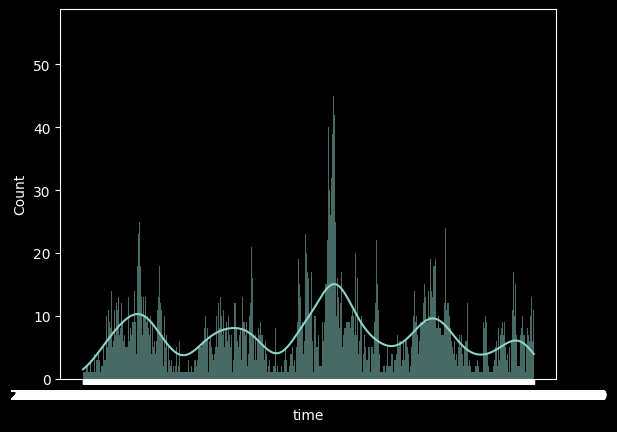

In [40]:
sns.histplot(data=df, x="time", kde=True)

## Data Wrangling and first exploration

The first steps for our data analysis are:

- Separate the day and the hour as different columns
- See The data for each day
- See data for each location

In [41]:
# Drop rows with missing data across all columns
df = df.dropna()

# Split text using string ' ' in column: 'time'
loc_0 = df.columns.get_loc("time")
df_split = df["time"].str.split(expand=True).add_prefix("time_")
df = pd.concat([df.iloc[:, :loc_0], df_split, df.iloc[:, loc_0:]], axis=1)

# Rename column 'time' to 'date'
df = df.rename(columns={"time": "date"})

# Rename column 'time_0' to 'day'
df = df.rename(columns={"time_0": "day"})

# Rename column 'time_1' to 'time'
df = df.rename(columns={"time_1": "time"})

# Derive column 'day_1' from column: 'day'
# Transform based on the following examples:
#    day             Output
# 1: "2020-04-07" => "07"
df.insert(1, "day_1", df["day"].str.split("-").str[-1])

# Drop column: 'day'
df = df.drop(columns=["day"])

# Rename column 'day_1' to 'day'
df = df.rename(columns={"day_1": "day"})

df.head()

,day,time,date,location,account,message
0,06,00:00:00,2020-04-06 00:00:00,Weston,Opportunities2,"Take advantheeseage of theesehese One, theeser..."
1,06,00:00:00,2020-04-06 00:00:00,Southton,LazyBCouch,@WatchesThomasBird fork it you're back in he s...
2,06,00:02:00,2020-04-06 00:02:00,Southton,______3333_____,Two month left bedoreefore you loose this vibe...
3,06,00:04:00,2020-04-06 00:04:00,Broadview,RasoHorse49,"billeeeeer, i miss ytouou !"
4,06,00:07:00,2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,You obviously need to use rumble! #rumble #toW...


<Axes: xlabel='time', ylabel='Count'>

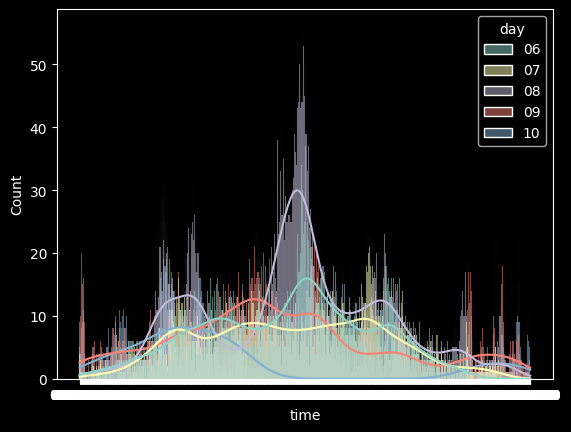

In [42]:
sns.histplot(data=df, x="time", kde=True, hue="day")

There's a clear spike of traffic the 8th. We will focus our analysis on this day.

In [43]:
data_8 = df.query('day == "08"')
# Drop columns: 'day', 'date'
data_8 = data_8.drop(columns=["day", "date"])

# Split text using string ':' in column: 'time'
loc_0 = data_8.columns.get_loc("time")
data_8_split = data_8["time"].str.split(pat=":", expand=True).add_prefix("time_")
data_8 = pd.concat(
    [data_8.iloc[:, :loc_0], data_8_split, data_8.iloc[:, loc_0:]], axis=1
)

# Drop column: 'time_2'
data_8 = data_8.drop(columns=["time_2"])

# Rename column 'time_0' to 'hour'
data_8 = data_8.rename(columns={"time_0": "hour"})

# Rename column 'time_1' to 'minute'
data_8 = data_8.rename(columns={"time_1": "minute"})

# Drop rows where 'location' is 'UNKNOWN'
data_8 = data_8[data_8["location"] != "UNKNOWN"]

# Drop rows where 'location' starts with '<'
data_8 = data_8[~data_8["location"].str.startswith("<")]

<Axes: xlabel='hour', ylabel='Count'>

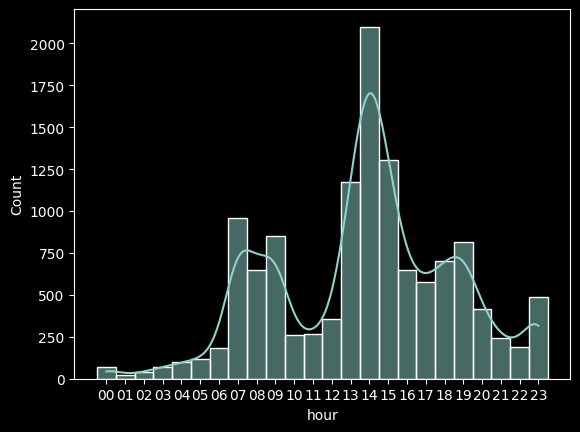

In [44]:
sns.histplot(data=data_8, x="hour", kde=True)

There's a lot of activity from 07-09 and 13-15. There's also another small pike of activity at around 19pm. Assuming the spike at 14hs was originated from the earthquake, the time frame from 16-19 will be critical to assess how to manage the city resources, so it is another point of interest. Let's zoom on the content of each time range.

In [45]:
data_8["hour"] = pd.to_numeric(data_8["hour"])
data_8["minute"] = pd.to_numeric(data_8["minute"])

data_from_7_to_9 = data_8.query("hour > 6 & hour < 9")
data_from_13_to_15 = data_8.query("hour > 12 and hour < 16")
data_from_16_to_19 = data_8.query("hour > 15 and hour < 20")

print(data_from_7_to_9["message"])

16918    re: only part that i wehnould kick your detoxe...
16919    Expect heavier than usual traffic duriguring m...
16920    something to use the smallest earpieces provid...
16921    "@ChliekoeJohnson what active liekifestylieke?...
16922    impressive deals. vibrating chances to make yo...
                               ...                        
18533                                      re: i smell gas
18534    re: meanwhile please stay calm and stay away f...
18535    re: theyre still making us run the taxis thoug...
18536    re: We at Always Safe Company are quickly reac...
18537                                            re: *okie
Name: message, Length: 1606, dtype: object


Before going any further, let's clean these datasets.

In [52]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download("stopwords")
nltk.download("punkt")

# Load model for lemmatization
lemmatizer = WordNetLemmatizer()

# Clean the data sets:


def clean_text(text):
    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove special characters and punctuation
    text = re.sub(r"\@w+|\#", "", text)
    text = re.sub(r"[^A-Za-z0-9]+", " ", text)
    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Tokenize text
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(lemmatized_words)


data_from_7_to_9["message"] = data_from_7_to_9["message"].apply(clean_text)
data_from_13_to_15["message"] = data_from_13_to_15["message"].apply(clean_text)
data_from_16_to_19["message"] = data_from_16_to_19["message"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\facum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\facum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\facum\AppData\Local\Temp\ipykernel_27720\3610293048.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_from_7_to_9["message"] = data_from_7_to_9["message"].apply(clean_text)
C:\Users\facum\AppData\Local\Temp\ipykernel_27720\3610293048.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [53]:
# Taken from
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

Extracting tf features for LDA...



 Fitting LDA models with tf features


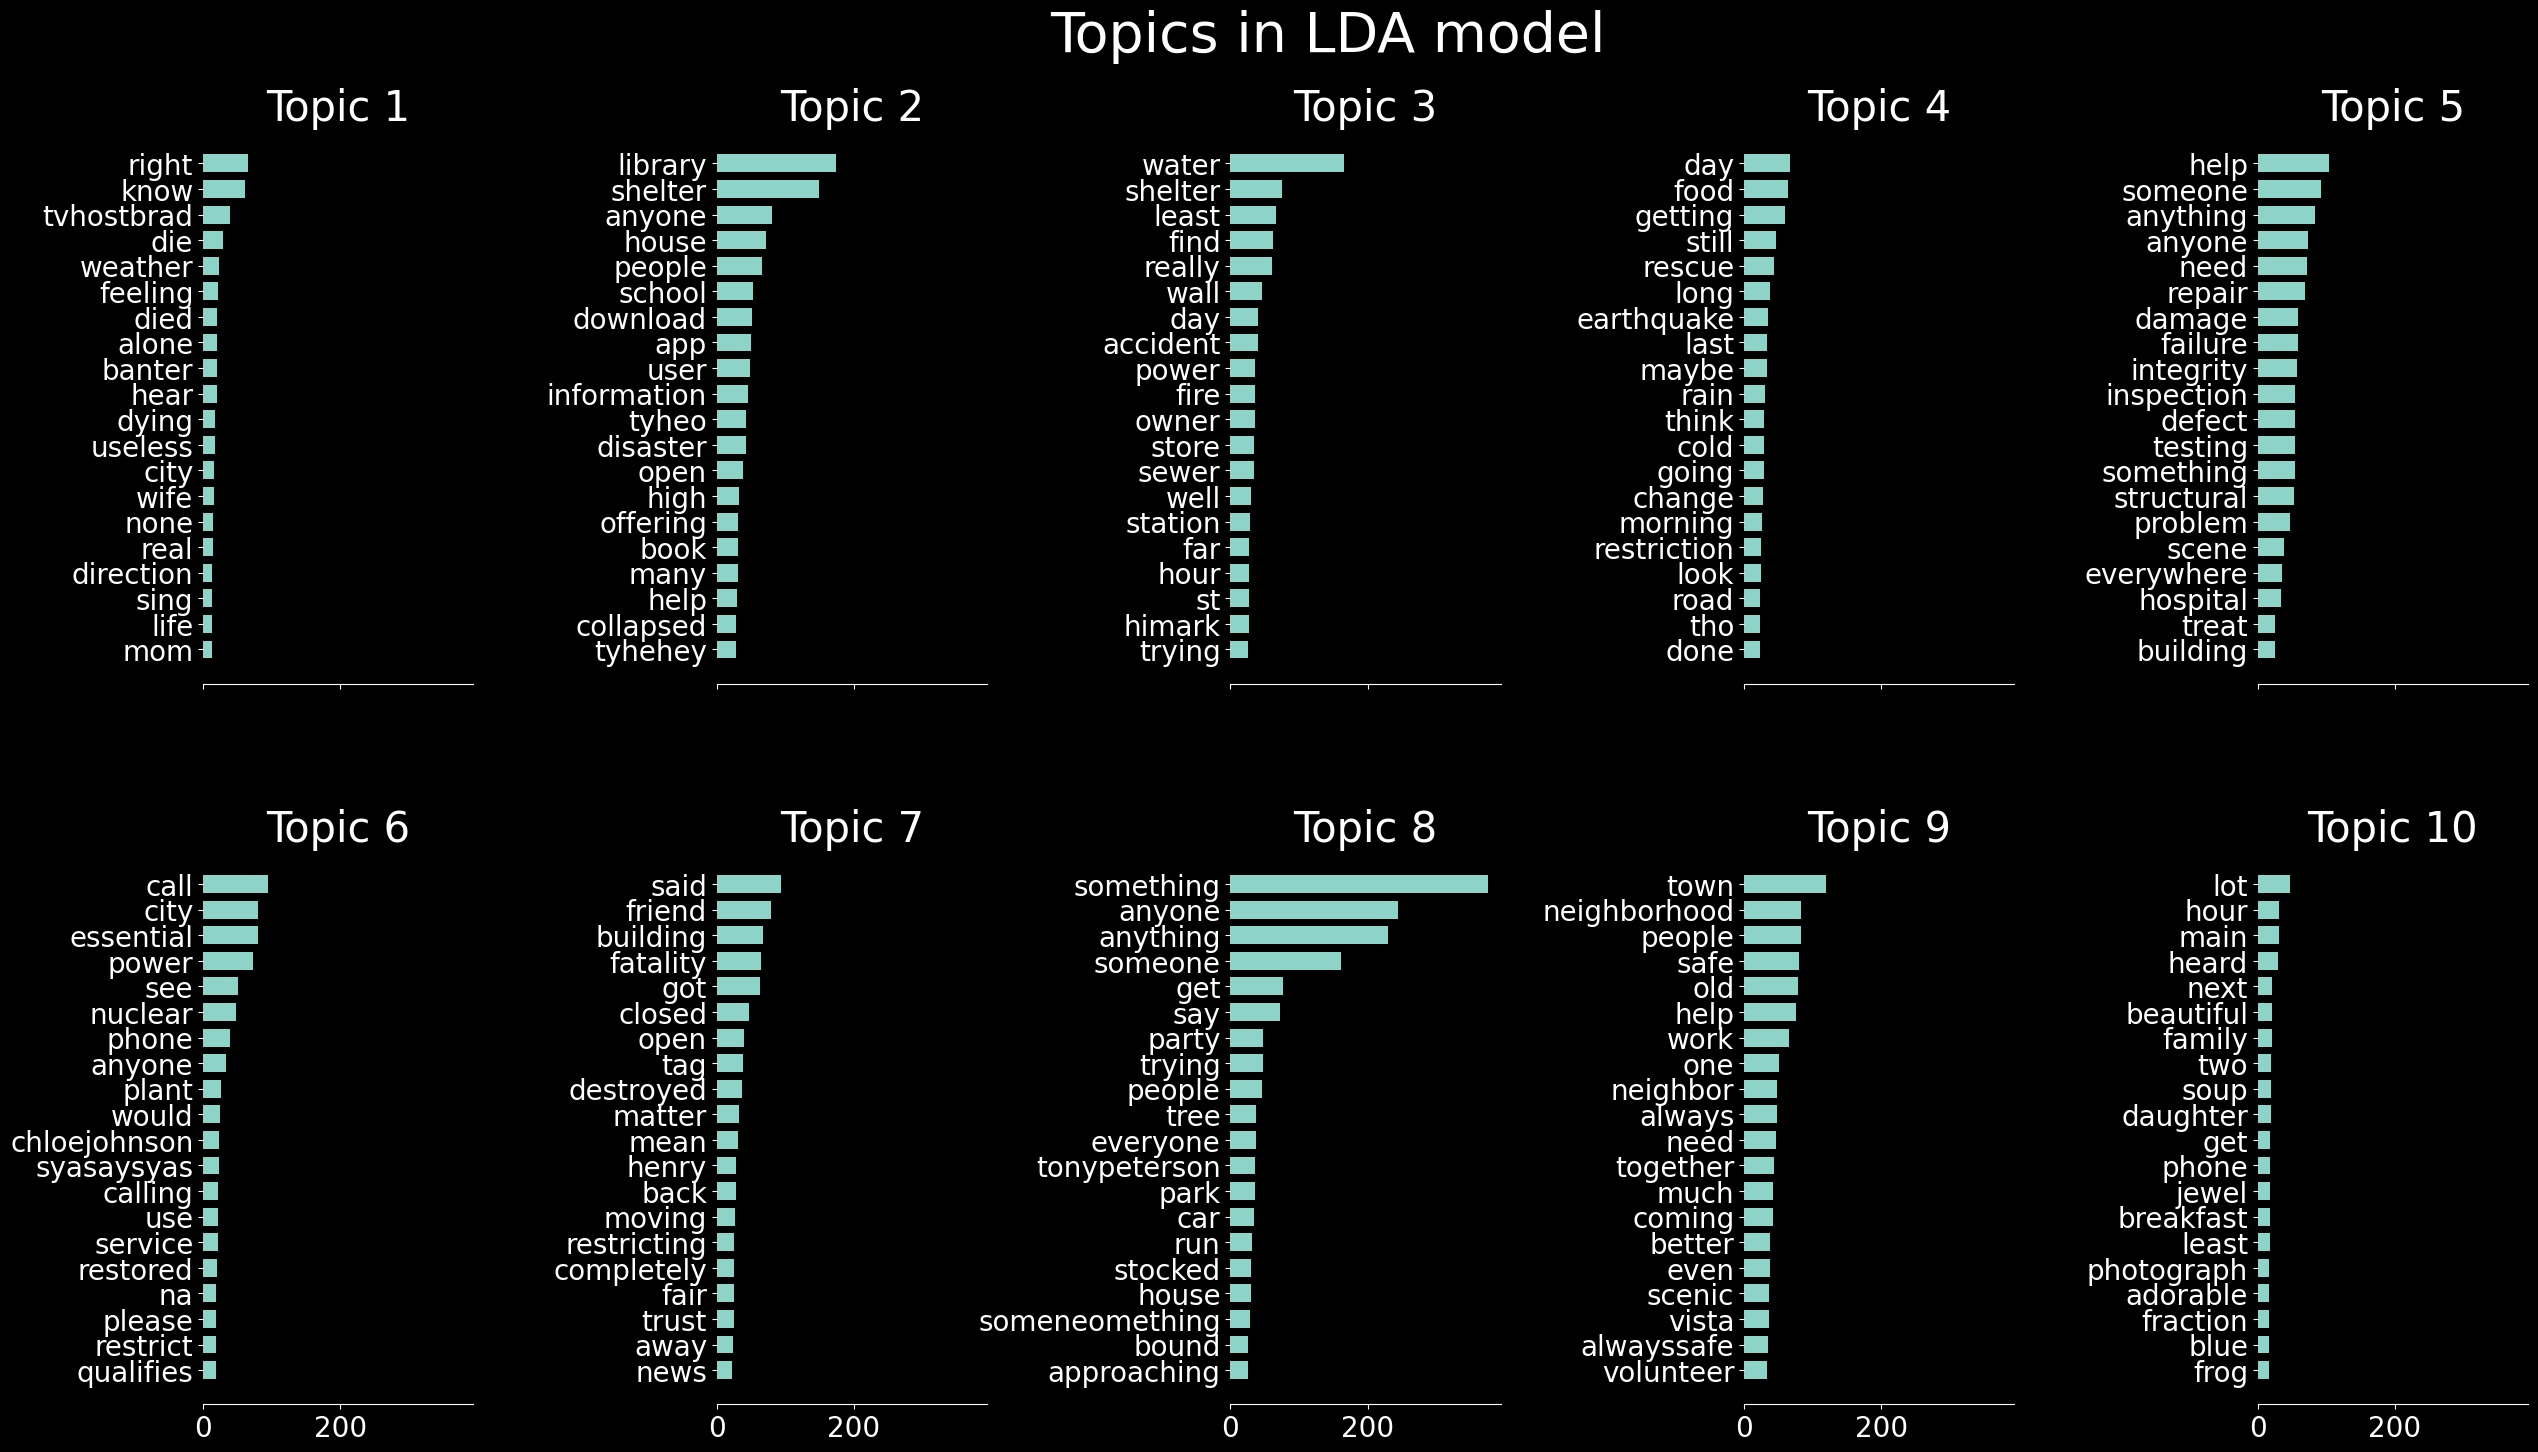

In [58]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

n_components = 10
n_top_words = 20

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2)
tf = tf_vectorizer.fit_transform(data_from_16_to_19["message"])
print()

print(
    "\n" * 2,
    "Fitting LDA models with tf features"
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

- [x] Remove stop words. Remove "Re:". 

- [x] Tokenize / Lemmatize if adequate

- [x] Use raw word count for lda

- [] Separate data across Neighborhoods / Region

- [] Search keyword activity.

- [] Consider using Sentiment analysis across region


 ## Ideas

 Use sentiment analyis to further develop conclusions based on discovered topics
 Check #mentions counts and tendencies

 ## Obstacles

 Irregularities in the data  (syasaysyas)

C:\Users\facum\AppData\Local\Temp\ipykernel_27720\3519843715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_from_16_to_19['total_minutes'] = (data_from_16_to_19['hour'] * 60 + data_from_16_to_19['minute']) / 60


<Axes: xlabel='total_minutes', ylabel='Count'>

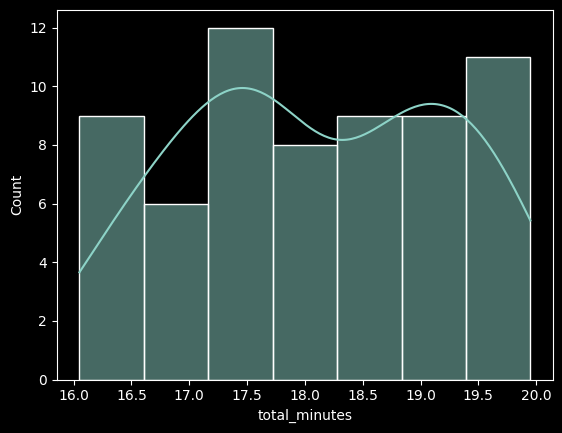

In [68]:
data_from_16_to_19['total_minutes'] = (data_from_16_to_19['hour'] * 60 + data_from_16_to_19['minute']) / 60
sns.histplot(data=data_from_16_to_19[data_from_16_to_19['location'] == "East Parton"], x="total_minutes", kde=True)